# Tips og triks for plotting
## Figurer
Menge elementer/operasjoner knyttet til en figur gjentas hver eneste gang. Det lønner seg da å definere disse operasjonene som funksjoner. For eksempel kan bredde og høyde på figur være konsekvent, og lagring av figurer kan gjøres til mange formater via en enkel kommando.

## Akser
Mange akseelementer gjentas til det uendelige. Et godt eksempel er Aksetitler. Hundrevis av 'Voltage/V vs RHE' har stort potensiale for feil. axes.voltage(ref='rhe') vil være langt mer robust, og enklere å endre i ettertid.

## Eksempel
Under ser vi et eksempel på bruk av /mypackage/ til å definere figur- og akseelementer

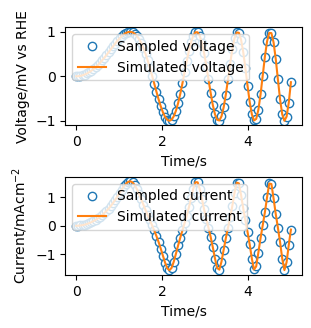

In [1]:
%matplotlib inline 
#widget did not work for some reason this session....
import matplotlib.pyplot as plt
import numpy as np
import mypackage.axes
import mypackage.figs
import importlib
importlib.reload(mypackage.axes)
importlib.reload(mypackage.figs)

mypackage.figs.style() #Alle figurer får samme stil


#Definer figur med konsekvent størrelse
fig,axs = plt.subplots(2,1, figsize=mypackage.figs.square(0.5), constrained_layout=True)

#Set noen aksetitler
axs[0].set_xlabel(mypackage.axes.time(unit='s'))
axs[0].set_ylabel(mypackage.axes.voltage(prefix='milli', ref='RHE'))
axs[1].set_xlabel(mypackage.axes.time(unit='s'))
axs[1].set_ylabel(mypackage.axes.current(prefix='milli', density='cm'))

x=np.linspace(0,5,100)
y=np.sin(x**2)
z=np.tan(y)

axs[0].plot(x,y, marker='o', mfc='w', ls='none', label='Sampled voltage')
axs[0].plot(x,y, label='Simulated voltage')

axs[1].plot(x,z, marker='o', mfc='w', ls='none', label='Sampled current')
axs[1].plot(x,z, label='Simulated current')

for ax in axs.ravel():
    ax.legend(loc='upper left')


#Lagre med flere formatr
mypackage.figs.savefig(fig, 'example_1')


